<a href="https://colab.research.google.com/github/federicocanzonieri/DeepLearning/blob/main/Lezione3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import load_iris

iris=load_iris()
X=iris.data
Y=iris.target

print(X.shape)
print(Y.shape)

print(Y)

(150, 4)
(150,)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [ ]:
import torch
import numpy as np

np.random.seed(1233)
torch.random.manual_seed(1233)

In [ ]:
idx=np.random.permutation(len(X))
X=X[idx]
Y=Y[idx]

In [ ]:
from torch import Tensor

X_training=Tensor(X[30:])
Y_training=Tensor(Y[30:])

X_testing=Tensor(X[:30])
Y_testing=Tensor(Y[:30])


X_mean=X_training.mean(0)
X_std=X_training.std(0)

X_training_norm=(X_training-X_mean)/X_std
X_testing_norm=(X_testing-X_mean)/X_std

In [ ]:
from torch import nn

class SoftMaxRegressor(nn.Module):

  def __init__(self,in_features,out_classes):
    super(SoftMaxRegressor,self).__init__()

    self.linear=nn.Linear(in_features,out_classes)

  def forward(self,x):
    scores=self.linear(x)

    return scores

model=SoftMaxRegressor(4,3)
softmax=nn.Softmax(dim=1)
print(model(X_training_norm)[:15])
print(softmax(model(X_training_norm))[:15])
print(softmax(model(X_training_norm)).sum(1))
preds=softmax(model(X_training_norm)).max(1)[1]
print(preds)


NameError: ignored

In [ ]:
from sklearn.metrics import accuracy_score

print(accuracy_score(Y_training,preds))
preds_logits=model(X_training_norm).max(1)[1]
print((preds_logits==preds).float().mean())

0.6583333333333333
tensor(1.)


In [ ]:
from torch.utils.tensorboard import SummaryWriter

writer = SummaryWriter('logs/softmax_regressor')
lr = 0.1
epochs = 500
#normalizzazione dei dati
X_mean = X_training.mean(0)
X_std = X_training.std(0)
X_training_norm = (X_training-X_mean)/X_std
X_testing_norm = (X_testing-X_mean)/X_std
model = SoftMaxRegressor(4,3)
criterion = nn.CrossEntropyLoss() #utilizziamo la cross entropy loss
optimizer = SGD(model.parameters(),lr) #utilizziamo un optimizer


for e in range(epochs):

  model.train()
  out=model(X_training_norm)
  l=criterion(out,Y_training.long())
  l.backward()

  optimizer.step()
  optimizer.zero_grad()

  # preds_train=out.max(1)[1]

preds_train = model(X_training_norm).max(1)[1]
preds_test = model(X_testing_norm).max(1)[1]
print("Accuracy di training",accuracy_score(Y_training,preds_train))
print("Accuracy di test",accuracy_score(Y_testing,preds_test))



NameError: ignored

In [ ]:
from torchvision.datasets import MNIST


mnist_train=MNIST(root='data',train=True,download=True)
mnist_test=MNIST(root='data',train=False,download=True)



Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw




Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw




Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw




Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw

Processing...
Done!


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:502: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:143.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [ ]:
print("Numero di campioni di training:",len(mnist_train))
print("Numero di campioni di test:",len(mnist_test))

Numero di campioni di training: 60000
Numero di campioni di test: 10000


In [ ]:
print(mnist_train[0])
print(mnist_test[0])
print(type(mnist_train[0][0]))#image PIL
print(type(mnist_train[0][1]))#label

(<PIL.Image.Image image mode=L size=28x28 at 0x7F9C5559A410>, 5)
(<PIL.Image.Image image mode=L size=28x28 at 0x7F9C5559A8D0>, 7)
<class 'PIL.Image.Image'>
<class 'int'>


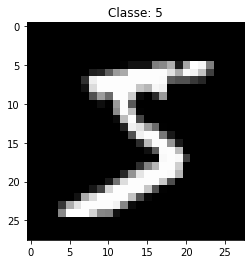

In [ ]:
from matplotlib import pyplot as plt
#cmap='gray' serve per evitare di visualizzare le immagini in falsi colori
plt.imshow(mnist_train[0][0],cmap='gray')
plt.title("Classe: "+str(mnist_train[0][1]))
plt.show()

In [ ]:
im=torch.from_numpy(np.array(mnist_train[0][0]))
im.shape

torch.Size([28, 28])

In [ ]:
from torchvision import  transforms

mnist_train=MNIST(root='data',train=True,download=True,transform=transforms.ToTensor())
mnist_test=MNIST(root='data',train=False,download=True,transform=transforms.ToTensor())


In [ ]:
sample = mnist_train[0]
print(type(sample[0]))
print(type(sample[1]))
print(mnist_train[0][0].shape)

<class 'torch.Tensor'>
<class 'int'>
torch.Size([1, 28, 28])


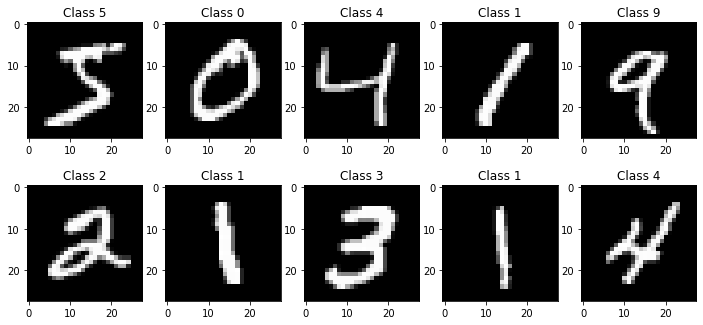

Media:0.13066048920154572
Dev st:0.308107852935791


In [ ]:
mnist_train[0][0].squeeze().numpy().shape

from matplotlib import pyplot as plt

plt.figure(figsize=(12,5.5))
for i in range(10):
  plt.subplot(2,5,i+1)
  plt.title('Class {}'.format(mnist_train[i][1]))#label
  plt.imshow(mnist_train[i][0].squeeze().numpy(),cmap='gray')

plt.show()


mean=0
for sample in mnist_train:
  mean+=sample[0].sum()

mean=mean/(len(mnist_train)*28*28)

std=0
for sample in mnist_train:
  std+=((sample[0]-mean)**2).sum()

std=np.sqrt(std/(len(mnist_train)*28*28))

print("Media:{}".format(mean))
print("Dev st:{}".format(std))

In [ ]:
sample=(mnist_train[15][0]-mean)/std
print("Minimo:",sample.min())
print("Massimo:",sample.max())
print("Media:",sample.mean()) #circa 0
print("Dev. Std.:",sample.std()) #circa 1

Minimo: tensor(-0.4241)
Massimo: tensor(2.8215)
Media: tensor(-0.0134)
Dev. Std.: tensor(0.9860)


In [ ]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((mean,),
(std,))])
mnist_train = MNIST(root='data',train=True, download=True, transform=transform)
mnist_test = MNIST(root='data',train=False, download=True, transform=transform)

In [ ]:
sample=mnist_train[15][0]
print("Minimo:",sample.min())
print("Massimo:",sample.max())
print("Media:",sample.mean())
print("Dev. Std.:",sample.std())

sample = sample.view(-1)
print(sample.shape)

Minimo: tensor(-0.4241)
Massimo: tensor(2.8215)
Media: tensor(-0.0134)
Dev. Std.: tensor(0.9860)
torch.Size([784])


In [ ]:
transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((mean,),(std,)),
transforms.Lambda(lambda x: x.view(-1))])#specifichiamo l'operazione "custom" 
##CONTA L'ORDINE DELLE TRASFORMAZIONI
mnist_train = MNIST(root='data',train=True, download=True, transform=transform)
mnist_test = MNIST(root='data',train=False, download=True, transform=transform)

In [ ]:
print(mnist_train[0][0].shape)
print(mnist_train[0][1])

torch.Size([784])
5


In [ ]:
from torch.utils.data import DataLoader

mnist_train_loader=DataLoader(mnist_train,batch_size=256,num_workers=5,shuffle=True)
mnist_test_loader=DataLoader(mnist_test,batch_size=256,num_workers=5)

for batch in mnist_test_loader:
  break

print(batch[0].shape)
print(batch[1].shape)

for batch in mnist_test_loader:
  pass

print(batch[0].shape)
print(batch[1].shape)



/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 5 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


torch.Size([256, 784])
torch.Size([256])
torch.Size([16, 784])
torch.Size([16])


In [ ]:
state_dict=model.state_dict()
print(state_dict.keys())
torch.save(model.state_dict(),'model.pth')

odict_keys(['linear.weight', 'linear.bias'])


In [ ]:
model = SoftMaxRegressor(4,3)
model.load_state_dict(torch.load('model.pth'))

<All keys matched successfully>

In [ ]:
torch.cuda.is_available()
device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)

model.to(device)

cuda


SoftMaxRegressor(
  (linear): Linear(in_features=4, out_features=3, bias=True)
)

In [ ]:
X_training_norm.to(device);

In [ ]:
class AverageValueMeter():
  def __init__(self):
    self.reset()

  def reset(self):
    self.sum = 0
    self.num = 0

  def add(self, value, num):
    self.sum += value*num
    self.num += num

  def value(self):
    try:
      return self.sum/self.num
    except:
      return None

In [ ]:
meter = AverageValueMeter()
meter.add(10,3) #inseriamo il valore 10, calcolato da un batch di 3 elementi
meter.add(3,5) #inseriamo il valore 3, calcolato da un batch di 5 elementi
meter.add(-1,2) #inseriamo il valore -1, calcolato da un batch di 2 elementi
#media pesata calcolata manualmente:
print('Media pesata calcolata manualmente:',(10*3+3*5-1*2)/(3+5+2))
print('Media pesata calcolata mediante meter:',meter.value())

Media pesata calcolata manualmente: 4.3
Media pesata calcolata mediante meter: 4.3


In [ ]:
meter.reset()
print(meter.value())

None


In [ ]:
from os.path import join

def train_classifier(model, train_loader, test_loader, exp_name='experiment', lr=0.001, epochs=10, momentum=0.9, logdir='logs'):
  criterion = nn.CrossEntropyLoss()
  optimizer = SGD(model.parameters(), lr, momentum=momentum)
  #meters
  loss_meter = AverageValueMeter()
  acc_meter = AverageValueMeter()
  #writer
  writer = SummaryWriter(join(logdir, exp_name))
  #device
  device = "cuda" if torch.cuda.is_available() else "cpu"
  model.to(device)
  #definiamo un dizionario contenente i loader di training e test
  loader = {
  'train' : train_loader,
  'test' : test_loader
  }
  #inizializziamo il global step
  global_step = 0
  for e in range(epochs):
  #iteriamo tra due modalità: train e test
    for mode in ['train','test']:
      loss_meter.reset(); acc_meter.reset()
      model.train() if mode == 'train' else model.eval()
      with torch.set_grad_enabled(mode=='train'): #abilitiamo i gradienti sol o in training
        for i, batch in enumerate(loader[mode]):
          x=batch[0].to(device) #"portiamoli sul device corretto"
          y=batch[1].to(device)
          output = model(x)

      #aggiorniamo il global_step
      #conterrà il numero di campioni visti durante il training
          n = x.shape[0] #numero di elementi nel batch
          global_step += n
          l = criterion(output,y)
          if mode=='train':
            l.backward()
            optimizer.step()
            optimizer.zero_grad()
            acc = accuracy_score(y.to('cpu'),output.to('cpu').max(1)[1])
            loss_meter.add(l.item(),n)
            acc_meter.add(acc,n)
          #loggiamo i risultati iterazione per iterazione solo durante il training
          if mode=='train':
            writer.add_scalar('loss/train', loss_meter.value(), global_step=global_step)
            writer.add_scalar('accuracy/train', acc_meter.value(), global_step=global_step)
            #una volta finita l'epoca (sia nel caso di training che test, loggiamo  le stime finali)
            writer.add_scalar('loss/' + mode, loss_meter.value(), global_step=global_step)
            writer.add_scalar('accuracy/' + mode, acc_meter.value(), global_step=global_step)

  #conserviamo i pesi del modello alla fine di un ciclo di training e test
    torch.save(model.state_dict(),'%s-%d.pth'%(exp_name,e+1))
  return model

In [ ]:
lr = 0.01
epochs = 10
momentum = 0


transform = transforms.Compose([transforms.ToTensor(),
transforms.Normalize((mean,),(std,)),
transforms.Lambda(lambda x: x.view(-1))])
mnist_train = MNIST(root='data',train=True, download=True, transform=transform)
mnist_test = MNIST(root='data',train=False, download=True, transform=transform)
mnist_train_loader = DataLoader(mnist_train, batch_size=256, num_workers=2, shuffle
=True)
mnist_test_loader = DataLoader(mnist_test, batch_size=256, num_workers=2)
model = SoftMaxRegressor(784, 10)
model = train_classifier(model, mnist_train_loader, mnist_test_loader, 'SGD-softmax-regressor', lr=lr, epochs=epochs, momentum=momentum)




In [ ]:
def test_classifier(model, loader):
  device = "cuda" if torch.cuda.is_available() else "cpu"
  model.to(device)
  predictions, labels = [], []
  for batch in loader:
    x = batch[0].to(device)
    y = batch[1].to(device)
    output = model(x)
    preds = output.to('cpu').max(1)[1].numpy()
    labs = y.to('cpu').numpy()
    predictions.extend(list(preds))
    labels.extend(list(labs)) 
  return np.array(predictions), np.array(labels)

In [ ]:
predictions_train, labels_train = test_classifier(model, mnist_train_loader)
predictions_test, labels_test = test_classifier(model, mnist_test_loader)
print("Accuarcy di training: %0.4f"% accuracy_score(labels_train, predictions_train))
print("Accuarcy di test: %0.4f"% accuracy_score(labels_test, predictions_test))

Accuarcy di training: 0.9128
Accuarcy di test: 0.9162



Extracting fashion/FashionMNIST/raw/train-images-idx3-ubyte.gz to fashion/FashionMNIST/raw




Extracting fashion/FashionMNIST/raw/train-labels-idx1-ubyte.gz to fashion/FashionMNIST/raw




Extracting fashion/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to fashion/FashionMNIST/raw




Extracting fashion/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to fashion/FashionMNIST/raw

Processing...
Done!


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:502: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:143.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


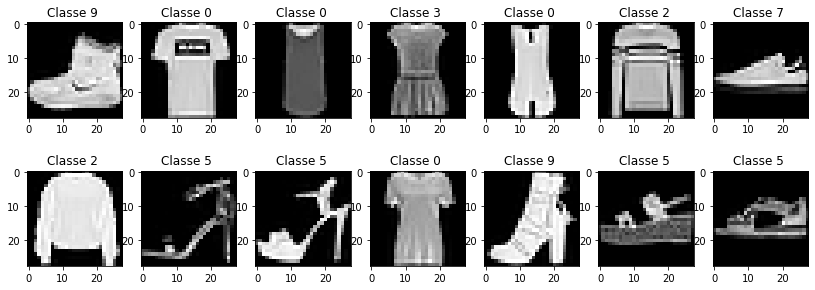

In [ ]:
from torchvision.datasets import FashionMNIST
import matplotlib.pyplot as plt
from torchvision import transforms


fashion_train=FashionMNIST(root='fashion',train=True,download=True,transform=transforms.ToTensor())

plt.figure(figsize=(14,5))
for i in range(14):
  plt.subplot(2,7,i+1)
  plt.title("Classe %d " % fashion_train[i][1])
  plt.imshow(fashion_train[i][0].squeeze().numpy(),cmap='gray')

plt.show()


In [ ]:
import numpy as np

mean=0
for sample in fashion_train:
  mean+=sample[0].sum()

mean=mean/(len(fashion_train)*28*28)

std=0
for sample in fashion_train:
  std+=((sample[0]-mean)**2).sum()

std=np.sqrt(std/(len(fashion_train)*28*28))

print("Media:{}".format(mean))
print("Dev st:{}".format(std))

Media:0.2860410809516907
Dev st:0.353024423122406


In [ ]:
from torch.utils.data import DataLoader
from torchvision import transforms


transform=transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((mean,),(std,)),
                              transforms.Lambda(lambda x: x.view(-1))])

fashion_train=FashionMNIST(root='data',train=True,download=True,transform=transform)
fashion_test=FashionMNIST(root='data',train=False,download=True,transform=transform)


fashion_train_loader=DataLoader(fashion_train,batch_size=256,num_workers=4,shuffle=True)
fashion_test_loader=DataLoader(fashion_test,batch_size=256,num_workers=4)



Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw




Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw




Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw




Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw

Processing...
Done!


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [ ]:
import torch
from sklearn.metrics import accuracy_score
fashion_softmax_regressor = SoftMaxRegressor(784, 10)
fashion_softmax_regressor = train_classifier(fashion_softmax_regressor,fashion_train_loader,fashion_test_loader, 'fashion_softmax_regressor',lr=0.01,epochs=10)



/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [ ]:
predictions_train_fashion_softmax_regressor, labels_train_fashion = test_classifier(fashion_softmax_regressor, fashion_train_loader)
predictions_test_fashion_softmax_regressor, labels_test_fashion = test_classifier(fashion_softmax_regressor, fashion_test_loader)
print("Fashion Softmax Regressor - Accuarcy di training: %0.4f"% accuracy_score(labels_train_fashion, predictions_train_fashion_softmax_regressor))
print("Fashion Softmax Regressor - Accuarcy di test: %0.4f"% accuracy_score(labels_test_fashion, predictions_test_fashion_softmax_regressor))

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Fashion Softmax Regressor - Accuarcy di training: 0.8683
Fashion Softmax Regressor - Accuarcy di test: 0.8455


In [ ]:
from torch import nn
from torch.optim import SGD
import torch
from sklearn.metrics import accuracy_score


class AverageValueMeter():
  def __init__(self):
    self.reset()

  def reset(self):
    self.sum = 0
    self.num = 0

  def add(self, value, num):
    self.sum += value*num
    self.num += num

  def value(self):
    try:
      return self.sum/self.num
    except:
      return None

class MLPClassifier(nn.Module):

  def __init__(self,in_f,hidden_u,out_c):

    super(MLPClassifier,self).__init__()
    self.hidden_layer=nn.Linear(in_f,hidden_u)
    self.activation=nn.Tanh()
    self.output_layer=nn.Linear(hidden_u,out_c)


  def fit(self, train_loader, test_loader, exp_name='experiment', lr=0.001, epochs=10, momentum=0.9, logdir='logs'):
    criterion = nn.CrossEntropyLoss()
    optimizer = SGD(self.parameters(), lr, momentum=momentum)
    
    loss_meter = AverageValueMeter()
    acc_meter = AverageValueMeter()
    
    #writer = SummaryWriter(join(logdir, exp_name))
    
    device = "cuda" if torch.cuda.is_available() else "cpu"
    self.to(device)
    
    loader = {
    'train' : train_loader,
    'test' : test_loader
    }
    #inizializziamo il global step
    global_step = 0
    for e in range(epochs):
    #iteriamo tra due modalità: train e test
      for mode in ['train','test']:
        loss_meter.reset(); acc_meter.reset()
        self.train() if mode == 'train' else self.eval()
        with torch.set_grad_enabled(mode=='train'): #abilitiamo i gradienti sol o in training
          for i, batch in enumerate(loader[mode]):
            x=batch[0].to(device) #"portiamoli sul device corretto"
            y=batch[1].to(device)
            output = self(x)
            c
            c
          
            n = x.shape[0] #numero di elementi nel batch
            global_step += n
            l = criterion(output,y)
            if mode=='train':
              l.backward()
              optimizer.step()
              optimizer.zero_grad()
              acc = accuracy_score(y.to('cpu'),output.to('cpu').max(1)[1])
              loss_meter.add(l.item(),n)
              acc_meter.add(acc,n)
            #loggiamo i risultati iterazione per iterazione solo durante il training
            if mode=='train':
              pass
              #writer.add_scalar('loss/train', loss_meter.value(), global_step=global_step)
              #writer.add_scalar('accuracy/train', acc_meter.value(), global_step=global_step)
              #una volta finita l'epoca (sia nel caso di training che test, loggiamo  le stime finali)
              #writer.add_scalar('loss/' + mode, loss_meter.value(), global_step=global_step)
              #writer.add_scalar('accuracy/' + mode, acc_meter.value(), global_step=global_step)

    #conserviamo i pesi del modello alla fine di un ciclo di training e test
      torch.save(self.state_dict(),'%s-%d.pth'%(exp_name,e+1))
 

  def predict(self, loader):
    device = "cuda" if torch.cuda.is_available() else "cpu"
    self.to(device)
    predictions, labels = [], []
    for batch in loader:
      x = batch[0].to(device)
      y = batch[1].to(device)
      output = self(x)
      preds = output.to('cpu').max(1)[1].numpy()
      labs = y.to('cpu').numpy()
      predictions.extend(list(preds))
      labels.extend(list(labs)) 
    return np.array(predictions), np.array(labels)

  def forward(self,x):
    hidden_repr=self.hidden_layer(x)
    hidden_repr=self.activation(hidden_repr)
    scores=self.output_layer(hidden_repr)
    return scores


model_MLP = MLPClassifier(784, 512, 5)
model_MLP.fit(fashion_train_loader,fashion_test_loader)
#pred,label=model_MLP.predict(fashion_train_loader)


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


KeyboardInterrupt: ignored

In [ ]:

pred,label=model_MLP.predict(fashion_train_loader)
print(pred,label)
pred_,label_=model_MLP.predict(fashion_test_loader)
print(pred_,label_)
print("Fashion MLP Classifier - Accuarcy di training: %0.4f"% accuracy_score(label, pred))
print("Fashion MLP Classifier - Accuarcy di test: %0.4f"% accuracy_score(label_, pred_))

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


[8 8 0 ... 6 9 9] [8 8 0 ... 6 9 9]
[9 2 1 ... 8 1 5] [9 2 1 ... 8 1 5]
Fashion MLP Classifier - Accuarcy di training: 0.8487
Fashion MLP Classifier - Accuarcy di test: 0.8324


In [ ]:
class DeepMLPClassifier(nn.Module):
  def __init__(self,in_f,hidden_u,out_c):

    super(DeepMLPClassifier,self).__init__()
    self.model=nn.Sequential(nn.Linear(in_f,hidden_u),
                                        nn.Tanh(),
                                        nn.Linear(hidden_u,hidden_u),
                                        nn.Tanh(),
                                        nn.Linear(hidden_u,hidden_u),
                                        nn.Tanh(),
                                        nn.Linear(hidden_u,out_c))
    
  def fit(self, train_loader, test_loader, exp_name='experiment', lr=0.001, epochs=10, momentum=0.9, logdir='logs'):
    criterion = nn.CrossEntropyLoss()
    optimizer = SGD(self.parameters(), lr, momentum=momentum)
    
    loss_meter = AverageValueMeter()
    acc_meter = AverageValueMeter()
    
    #writer = SummaryWriter(join(logdir, exp_name))
    
    device = "cuda" if torch.cuda.is_available() else "cpu"
    self.to(device)
    
    loader = {
    'train' : train_loader,
    'test' : test_loader
    }
    #inizializziamo il global step
    global_step = 0
    for e in range(epochs):
    #iteriamo tra due modalità: train e test
      for mode in ['train','test']:
        loss_meter.reset(); acc_meter.reset()
        self.train() if mode == 'train' else self.eval()
        with torch.set_grad_enabled(mode=='train'): #abilitiamo i gradienti sol o in training
          for i, batch in enumerate(loader[mode]):
            x=batch[0].to(device) #"portiamoli sul device corretto"
            y=batch[1].to(device)
            output = self(x)

        #aggiorniamo il global_step
        #conterrà il numero di campioni visti durante il training
            n = x.shape[0] #numero di elementi nel batch
            global_step += n
            l = criterion(output,y)
            if mode=='train':
              l.backward()
              optimizer.step()
              optimizer.zero_grad()
              acc = accuracy_score(y.to('cpu'),output.to('cpu').max(1)[1])
              loss_meter.add(l.item(),n)
              acc_meter.add(acc,n)
            #loggiamo i risultati iterazione per iterazione solo durante il training
            if mode=='train':
              pass
              #writer.add_scalar('loss/train', loss_meter.value(), global_step=global_step)
              #writer.add_scalar('accuracy/train', acc_meter.value(), global_step=global_step)
              #una volta finita l'epoca (sia nel caso di training che test, loggiamo  le stime finali)
              #writer.add_scalar('loss/' + mode, loss_meter.value(), global_step=global_step)
              #writer.add_scalar('accuracy/' + mode, acc_meter.value(), global_step=global_step)

    #conserviamo i pesi del modello alla fine di un ciclo di training e test
      torch.save(self.state_dict(),'%s-%d.pth'%(exp_name,e+1))
 

  def predict(self, loader):
    device = "cuda" if torch.cuda.is_available() else "cpu"
    self.to(device)
    predictions, labels = [], []
    for batch in loader:
      x = batch[0].to(device)
      y = batch[1].to(device)
      output = self(x)
      preds = output.to('cpu').max(1)[1].numpy()
      labs = y.to('cpu').numpy()
      predictions.extend(list(preds))
      labels.extend(list(labs)) 
    return np.array(predictions), np.array(labels)



  def forward(self,x):
    return self.model(x)


model_MLP_Deep = DeepMLPClassifier(784, 512, 10)
model_MLP_Deep.fit(fashion_train_loader,fashion_test_loader)


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [ ]:
pred,label=model_MLP_Deep.predict(fashion_train_loader)
print(pred,label)
pred_,label_=model_MLP_Deep.predict(fashion_test_loader)
print(pred_,label_)
print("Fashion MLP Classifier - Accuarcy di training: %0.4f"% accuracy_score(label, pred))
print("Fashion MLP Classifier - Accuarcy di test: %0.4f"% accuracy_score(label_, pred_))

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


[8 6 1 ... 7 8 6] [8 2 1 ... 7 8 6]
[9 2 1 ... 8 1 5] [9 2 1 ... 8 1 5]
Fashion MLP Classifier - Accuarcy di training: 0.8450
Fashion MLP Classifier - Accuarcy di test: 0.8289


In [ ]:
!wget http://people.csail.mit.edu/torralba/code/spatialenvelope/spatial_envelope_256x256_static_8outdoorcategories.zip

--2021-04-18 09:53:58--  http://people.csail.mit.edu/torralba/code/spatialenvelope/spatial_envelope_256x256_static_8outdoorcategories.zip
Resolving people.csail.mit.edu (people.csail.mit.edu)... 128.30.2.133
Connecting to people.csail.mit.edu (people.csail.mit.edu)|128.30.2.133|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 135033638 (129M) [application/zip]
Saving to: ‘spatial_envelope_256x256_static_8outdoorcategories.zip’

spatial_envelope_25 100%[===================>] 128.78M  7.69MB/s    in 17s     

2021-04-18 09:54:15 (7.69 MB/s) - ‘spatial_envelope_256x256_static_8outdoorcategories.zip’ saved [135033638/135033638]



In [ ]:
!mkdir scenes


mkdir: cannot create directory ‘scenes’: File exists
[Errno 2] No such file or directory: '/scenes'
/content


In [ ]:
%cd scenes

/content/scenes


In [ ]:
!wget http://iplab.dmi.unict.it/furnari/downloads/8scenes_train_test_split.zip

--2021-04-18 09:58:24--  http://iplab.dmi.unict.it/furnari/downloads/8scenes_train_test_split.zip
Resolving iplab.dmi.unict.it (iplab.dmi.unict.it)... 151.97.252.83
Connecting to iplab.dmi.unict.it (iplab.dmi.unict.it)|151.97.252.83|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://iplab.dmi.unict.it/furnari/downloads/8scenes_train_test_split.zip [following]
--2021-04-18 09:58:25--  https://iplab.dmi.unict.it/furnari/downloads/8scenes_train_test_split.zip
Connecting to iplab.dmi.unict.it (iplab.dmi.unict.it)|151.97.252.83|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://www.antoninofurnari.it/downloads/8scenes_train_test_split.zip [following]
--2021-04-18 09:58:26--  http://www.antoninofurnari.it/downloads/8scenes_train_test_split.zip
Resolving www.antoninofurnari.it (www.antoninofurnari.it)... 217.64.195.229, 2001:4b78:1001::501
Connecting to www.antoninofurnari.it (www.antoninofurnari.it)

In [ ]:
!unzip spatial_envelope_256x256_static_8outdoorcategories.zip

In [ ]:
from torch.utils.data.dataset import Dataset
from PIL import Image
from os import path

class ScenesDataset(Dataset):

  def __init__(self,base_path,txt_list,transform=None):

    self.base_path=base_path
    self.images=np.loadtxt(txt_list,dtype=str,delimiter=',')
    self.transform=transform
  def __getitem__(self,index):
    f,c=self.images[index]
    im=Image.open(path.join(self.base_path,f))
    if self.transform is not None:
      im=self.transform(im)
    
    label=int(c)

    return {'image':im,'label':label}

  def __len__(self):
    return len(self.images)
    

In [ ]:
ls

8scenes_train_test_split.zip
classes.txt
spatial_envelope_256x256_static_8outdoorcategories/
spatial_envelope_256x256_static_8outdoorcategories.zip
test.txt
train.txt


torch.Size([3, 32, 32])
1


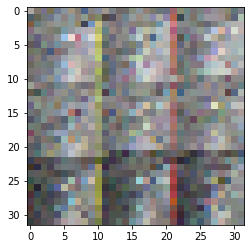

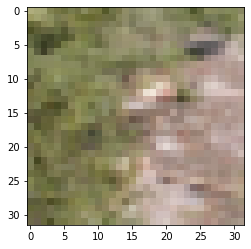

In [ ]:
transform=transforms.Compose([transforms.Resize(32),transforms.ToTensor()])
dataset=ScenesDataset('spatial_envelope_256x256_static_8outdoorcategories','train.txt',transform=transform)
sample=dataset[0]

print(sample['image'].shape)
print(sample['label'])
plt.imshow(sample['image'].view(32,32,3).numpy())
plt.figure()
image=np.zeros((32,32,3))
image[:,:,0]=sample['image'][0,:,:]
image[:,:,1]=sample['image'][1,:,:]
image[:,:,2]=sample['image'][2,:,:]
plt.imshow(image)

In [ ]:
dataset=ScenesDataset('spatial_envelope_256x256_static_8outdoorcategories','train.txt',transform=transforms.ToTensor())

mean=np.zeros(3)

for sample in dataset:
  mean+=sample['image'].sum(1).sum(1).numpy()

mean=mean/(len(dataset)*256*256)

std=np.zeros(3)
for sample in dataset:
  std+=((sample['image']-torch.Tensor(mean).view(3,1,1))**2).sum(1).sum(1).numpy()

std=np.sqrt(std/(len(dataset)*256*256))




In [ ]:
print("Medie",mean)
print("Dev.Std.",std)

Medie [0.42478886 0.45170452 0.4486708 ]
Dev.Std. [0.25579566 0.24652381 0.27658252]


torch.Size([3072])
1


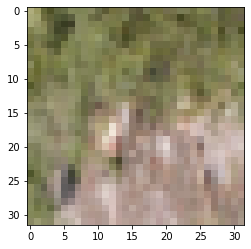

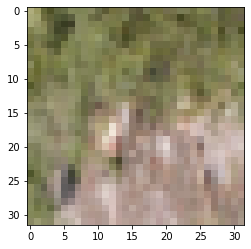

In [ ]:
transform = transforms.Compose([transforms.Resize(32),
transforms.ToTensor(),
# transforms.Normalize(mean,std),
transforms.Lambda(lambda x: x.view(-1))])
dataset = ScenesDataset('spatial_envelope_256x256_static_8outdoorcategories','train.txt',transform=transform)
print(dataset[0]['image'].shape)
print(dataset[0]['label'])

img=dataset[0]['image'].numpy()
plt.imshow(img.reshape(32,32,3,order='F'))
plt.figure()

image=np.zeros((32,32,3))
image[:,:,0]=dataset[0]['image'].view(3,32,32)[0,:,:]
image[:,:,1]=dataset[0]['image'].view(3,32,32)[1,:,:]
image[:,:,2]=dataset[0]['image'].view(3,32,32)[2,:,:]
image[:,:,0]=image[:,:,0].T
image[:,:,1]=image[:,:,1].T
image[:,:,2]=image[:,:,2].T

plt.imshow(image)


# **Ricomincio da qua**

In [ ]:
from sklearn.datasets import load_iris

iris=load_iris()
X=iris.data
y=iris.target

print(X.shape)
print(y.shape)
print(y[:10])

import torch
import numpy as np
np.random.seed(1234)
torch.random.manual_seed(1234);

(150, 4)
(150,)
[0 0 0 0 0 0 0 0 0 0]


In [ ]:
idx = np.random.permutation(len(X))
X = X[idx]
y = y[idx]

from torch import Tensor
X_training = Tensor(X[30:])
Y_training = Tensor(y[30:])
X_testing = Tensor(X[:30])
Y_testing = Tensor(y[:30])

X_mean = X_training.mean(0)
X_std = X_training.std(0)

X_training_norm = (X_training-X_mean)/X_std
X_testing_norm = (X_testing-X_mean)/X_std

In [ ]:
from torch import nn

class SoftMaxRegressor(nn.Module):

  def __init__(self,in_f,out_c):
    super(SoftMaxRegressor,self).__init__()

    self.linear=nn.Linear(in_f,out_c)


  def forward(self,x,y):

    scores=self.linear(x)
    return scores
    resul=torch.zeros(scores.shape[0])
    rang=np.arange(0,scores.shape[0])
    for score,index,rg in zip(scores,y,rang):
      #print(score[index.long()])
      #print(index)
      resul[rg]=score[index.int()]
     ###continuare qui 
    # print(resul[:5])
    # print(scores[:5])
    # print(y[:5])
    return resul

model = SoftMaxRegressor(4,3)# 4 feature in ingresso, 3 classi in uscita
#mostriamo le prime 4 predizioni
model(X_training_norm,Y_training)[:5]

tensor([[ 0.9326,  0.6582, -0.2940],
        [-0.1301, -0.2885,  0.1746],
        [ 1.1440,  1.6170, -1.0236],
        [-0.1766, -0.4061,  0.2196],
        [-0.4706, -0.5166,  0.2307]], grad_fn=<SliceBackward>)

tensor([[ 0, 20],
        [10,  5]])


In [ ]:
softmax=nn.Softmax(dim=1)
softmax(model(X_training_norm))[:10]

tensor([[0.4870, 0.3701, 0.1428],
        [0.3116, 0.2659, 0.4225],
        [0.3678, 0.5902, 0.0421],
        [0.3048, 0.2423, 0.4529],
        [0.2518, 0.2405, 0.5077],
        [0.4020, 0.5516, 0.0465],
        [0.4734, 0.4893, 0.0372],
        [0.3831, 0.5499, 0.0670],
        [0.3571, 0.6167, 0.0262],
        [0.5180, 0.3277, 0.1543]], grad_fn=<SliceBackward>)

In [ ]:
preds = softmax(model(X_training_norm)).max(1)[1]
preds

tensor([0, 2, 1, 2, 2, 1, 1, 1, 1, 0, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
        0, 0, 0, 2, 2, 1, 1, 2, 2, 2, 1, 1, 1, 2, 0, 2, 2, 0, 1, 2, 1, 2, 1, 0,
        0, 1, 0, 1, 2, 2, 2, 1, 1, 1, 2, 2, 0, 1, 2, 2, 1, 2, 2, 0, 1, 1, 0, 0,
        1, 2, 0, 2, 2, 0, 1, 2, 2, 1, 1, 2, 0, 0, 0, 0, 1, 0, 2, 2, 2, 2, 1, 1,
        1, 1, 2, 2, 2, 1, 1, 2, 2, 2, 0, 0, 2, 2, 2, 1, 2, 1, 1, 2, 2, 0, 1, 1])

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(Y_training,preds))

NameError: ignored

In [ ]:
preds_logits = model(X_training_norm,y).max(1)[1]
print(preds_logits)

def myCustomLoss(scores, my_labels):

    resul=torch.zeros(scores.shape[0])
    rang=np.arange(0,scores.shape[0])
    for score,index,rg in zip(scores,y,rang):
      #print(score[index.long()])
      #print(index)
      resul[rg]=score[index]

    return torch.sum(-torch.log(resul))




tensor([0, 0, 1, 0, 1, 1, 2, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
        0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 2, 1, 2, 1, 0,
        1, 0, 1, 1, 0, 1, 2, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 2, 1,
        1, 2, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 2, 1])


In [ ]:
from torch.utils.tensorboard import SummaryWriter
from torch.optim import SGD

writer = SummaryWriter('logs/softmax_regressor')

lr = 0.1
epochs = 5000

X_mean = X_training.mean(0)
X_std = X_training.std(0)

X_training_norm = (X_training-X_mean)/X_std
X_testing_norm = (X_testing-X_mean)/X_std

model = SoftMaxRegressor(4,3)
#criterion = nn.CrossEntropyLoss() #utilizziamo la cross entropy loss
optimizer = SGD(model.parameters(),lr) #

criterion = myCustomLoss #utilizziamo la cross entropy loss


for e in range(epochs):
  model.train()
  out = model(X_training_norm,Y_training)
  #print(Y_training.shape)#
 
  l=criterion(out,Y_training.long())
  #l = criterion(out,Y_training.long())
  

  l.backward()
  writer.add_scalar('loss/train', l.item(), global_step=e)

  optimizer.step()
  optimizer.zero_grad()
  preds_train = out.max(1)[1]
  #writer.add_scalar('accuracy/train', accuracy_score(Y_training,preds_train), global_step=e)

  model.eval()
  with torch.set_grad_enabled(False):
    out = model(X_testing_norm,Y_testing)
    l = criterion(out, Y_testing.long())
    writer.add_scalar('loss/test', l.item(), global_step=e)
    preds_test = out.max(1)[1]
    #writer.add_scalar('accuracy/test', accuracy_score(Y_testing,preds_test), global_step=e)


preds_train = model(X_training_norm,Y_training).max(1)[1]
preds_test = model(X_testing_norm,Y_testing).max(1)[1]
print(preds_train[:10])
print(Y_training[:10])
print("Accuracy di training",accuracy_score(Y_training,preds_train))
print("Accuracy di test",accuracy_score(Y_testing,preds_test))


tensor([1, 1, 1, 2, 2, 1, 1, 1, 1, 1])
tensor([1., 2., 0., 2., 1., 0., 0., 0., 0., 1.])
Accuracy di training 0.5083333333333333
Accuracy di test 0.5333333333333333


In [ ]:
##DATALOADER

from torchvision.datasets import MNIST

mnist_train=MNIST(root='data',train=True,download=True)
mnist_test=MNIST(root='data',train=False,download=True)


Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw




Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw




Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw

Processing...
Done!


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:502: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:143.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [ ]:
print("Numero di campioni di training:",len(mnist_train))
print("Numero di campioni di test:",len(mnist_test))

print(mnist_train[0])
print(mnist_test[0])
print(type(mnist_train[0][0]))
print(type(mnist_train[0][1]))

Numero di campioni di training: 60000
Numero di campioni di test: 10000
(<PIL.Image.Image image mode=L size=28x28 at 0x7FBD418FC110>, 5)
(<PIL.Image.Image image mode=L size=28x28 at 0x7FBD4191AD10>, 7)
<class 'PIL.Image.Image'>
<class 'int'>


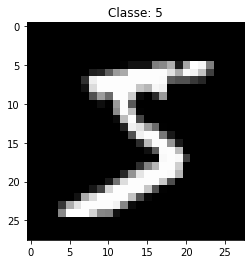

In [ ]:
from matplotlib import pyplot as plt
#cmap='gray' serve per evitare di visualizzare le immagini in falsi colori
plt.imshow(mnist_train[0][0],cmap='gray')
plt.title("Classe: "+str(mnist_train[0][1]))
plt.show()

In [ ]:
import torch
import numpy as np

im=torch.from_numpy(np.array(mnist_train[0][0]))
im.shape #l'immagine è un tensore 28x28 pixels

torch.Size([28, 28])

In [ ]:
from torchvision import transforms
mnist_train = MNIST(root='data',train=True, download=True, transform=transforms.ToTensor())
mnist_test = MNIST(root='data',train=False, download=True, transform=transforms.ToTensor())
sample = mnist_train[0]
print(type(sample[0]))
print(type(sample[1]))
print(mnist_train[0][0].shape)

<class 'torch.Tensor'>
<class 'int'>
torch.Size([1, 28, 28])


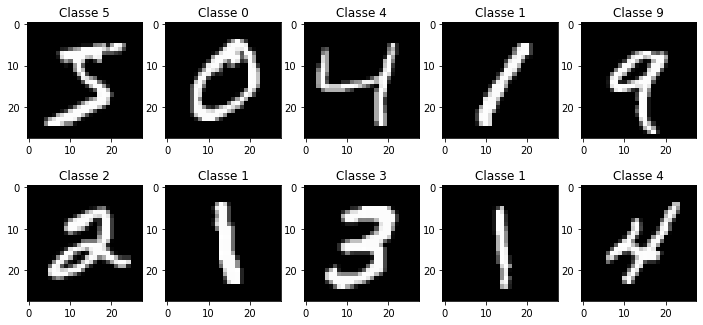

In [ ]:
from matplotlib import pyplot as plt
plt.figure(figsize=(12,5.5))
for i in range(10):
  plt.subplot(2,5,i+1)
  plt.title("Classe %d" % mnist_train[i][1])
  plt.imshow(mnist_train[i][0].squeeze().numpy(),cmap='gray')
#`squeeze` serve a trasformare il tensore 1 x 28 x 28 in un tensore 28 x 28
plt.show()


In [ ]:
m = 0
for sample in mnist_train:
  m+=sample[0].sum() #accumuliamo la somma di tutti i pixel#dividiamo per il numero di immagini moltiplicato per il numero di pixel
m=m/(len(mnist_train)*28*28)

#procedura simile per calcolare la deviazione standard
s=0
for sample in mnist_train:
  s+=((sample[0]-m)**2).sum()

s=np.sqrt(s/(len(mnist_train)*28*28))
print("Mean: %0.4f"%m)
print("Std: %0.4f"%s)

Mean: 0.1307
Std: 0.3081


In [ ]:
sample=(mnist_train[15][0]-m)/s
print("Minimo:",sample.min())
print("Massimo:",sample.max())
print("Media:",sample.mean())
print("Dev. Std.:",sample.std())

Minimo: tensor(-0.4241)
Massimo: tensor(2.8215)
Media: tensor(-0.0134)
Dev. Std.: tensor(0.9860)


In [ ]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((m,),
(s,))])
mnist_train = MNIST(root='data',train=True, download=True, transform=transform)
mnist_test = MNIST(root='data',train=False, download=True, transform=transform)

In [ ]:
sample = sample.view(-1)
print(sample.shape)

torch.Size([784])


In [ ]:
transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((m,),(s,)),
transforms.Lambda(lambda x: x.view(-1))])#specifichiamo l'operazione "custom"
mnist_train = MNIST(root='data',train=True, download=True, transform=transform)
mnist_test = MNIST(root='data',train=False, download=True, transform=transform)

print(mnist_train[0][0].shape)
print(mnist_train[0][1])


torch.Size([784])
5


In [ ]:
from torch.utils.data import DataLoader
mnist_train_loader = DataLoader(mnist_train, batch_size=256, num_workers=2, shuffle=True)
#shuffle permette di accedere ai dati in maniera casuale
mnist_test_loader = DataLoader(mnist_test, batch_size=256, num_workers=2)

In [ ]:
for batch in mnist_test_loader:
  break

print(batch[0].shape)
print(batch[1].shape)

for batch in mnist_test_loader:
  pass

print(batch[0].shape)
print(batch[1].shape)

torch.Size([256, 784])
torch.Size([256])
torch.Size([16, 784])
torch.Size([16])


In [ ]:
state_dict=model.state_dict()
print(state_dict.keys())
torch.save(model.state_dict(),'model.pth')

NameError: ignored